In [1]:
import csv
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.optimize

def cap(x, C):
    return 1 / x / 2 / np.pi / C

def read_esp(filename, sets):
    frequencies = []
    impedances = []
    with open(filename, 'rt') as file:
        reader = csv.reader(x.replace('\0', '') for x in file)

        # skip header
        for idx in range(2):
            next(reader)

        for idx in range(sets):
            # read data
            temp_freq = []
            temp_imp = []
            count = 0
            for row in reader:
                # if count == 0:
                #     print(row)
                count += 1
                if count == 84:
                    break
                elif count <= 10:
                    pass
                elif len(row) == 0:
                    pass
                elif row == ['ÿþ']:
                    pass
                else:
                    temp_freq.append(float(row[0]))
                    temp_imp.append(float(row[3]))
            frequencies.append(np.array(temp_freq))
            impedances.append(np.array(temp_imp))
            skip = 2
            try:
                for idx in range(skip):
                    next(reader)
            except:
                break
                
    #     for idx in range(6):
    #         next(reader)
    #     for row in reader:
    #         if len(row) == 0:
    #             pass
    #         elif row == ['ÿþ']:
    #             pass
    #         else:
    #             frequencies.append(float(row[0]))
    #             impedances.append(float(row[3]))
    return frequencies[0], impedances

f, Z = read_esp(R'D:\Local Documents\Research\Khalid\Functionalization Measurements\Biotin Chip Hole 1.csv', sets=7)

meanZBuffer = np.mean(Z[0:3], axis=0)
stdZBuffer = np.std(Z[0:3], axis=0, ddof=1)
meanZStrep = np.mean(Z[3:6], axis=0)
stdZStrep = np.std(Z[3:6], axis=0, ddof=1)

# popt, pcov = scipy.optimize.curve_fit(cap, f, meanZBuffer)
# print(popt)

plt.figure(figsize=(14,10))

plt.plot(f, meanZBuffer, 'forestgreen', label='Buffer PBS 1x')
plt.fill_between(f, meanZBuffer - stdZBuffer, meanZBuffer + stdZBuffer, color='forestgreen', alpha=0.3)

plt.plot(f, meanZStrep, 'cornflowerblue', label='Streptavidin 10mg/mL')
plt.fill_between(f, meanZStrep - stdZStrep, meanZStrep + stdZStrep, color='cornflowerblue', alpha=0.3)

plt.plot(f, Z[-1], 'darkorange', label='Back to Buffer')

plt.legend()
plt.title('Functionalized Chip Hole 1', fontsize=20)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Impedance ($\Omega$)', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.savefig(R'D:\Local Documents\Research\Khalid\Functionalization Measurements\Functionalized Chip 1 Overall.png', bbox_inches='tight')
plt.show()

######################################
difference = np.subtract(Z[-1], meanZBuffer)
meanDifference = np.mean(difference)
stdDifference = np.sqrt(stdZBuffer**2 + stdZStrep**2)
print('Mean difference between buffer and back to buffer:', meanDifference)
print('Noise level in buffer:', np.mean(stdZBuffer))
print('Noise level in strep:', np.mean(stdZStrep))

plt.figure(figsize=(14,10))
plt.plot(f, difference, 'forestgreen', label='Experimental Difference Between Buffer Solutions')
cap = 1e-6
capChange = 10e-6
plt.plot(f, -(1 / f / 2 / np.pi / (cap+capChange)) + (1 / f / 2 / np.pi / cap) + 840, 'darkorange', label='Theoretical Difference Between Buffer Solutions (Shifted)')
plt.fill_between(f, difference - stdDifference, difference + stdDifference, color='forestgreen', alpha=0.2)
plt.legend()
plt.title('Functionalized Chip Hole 1', fontsize=20)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Impedance ($\Omega$)', fontsize=16)
plt.yscale('log')
plt.xscale('log')
plt.savefig(R'D:\Local Documents\Research\Khalid\Functionalization Measurements\Functionalized Chip 1 Differences.png', bbox_inches='tight')
plt.show()

###########################################
# Buffer = [10,6,8] = 1,13,14
# BSA =  [9/11/12/13] = 2,3,15
# Back to buffer 1 = [14,15,16] = 4,5,6
# strep = [17,18,19] = 7,8,9
# back to buffer 2 = [20,21,22] = 10,11,12
testLabels = ['Buffer 1 v1','Buffer 1 v2', 'Buffer 1 v3', 'Streptavidin v1', 'Streptavidin v2', 'Streptavidin v3','Buffer 2 v1']
color=iter(plt.cm.rainbow(np.linspace(0,1,len(testLabels))))
plt.figure(figsize=(14,10))
for idx in range(len(testLabels)):
    c = next(color)
    plt.plot(f, Z[idx], label=testLabels[idx], c=c)

plt.legend()
plt.title('Functionalized Chip Hole 1', fontsize=20)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Impedance ($\Omega$)', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.savefig(R'D:\Local Documents\Research\Khalid\Functionalization Measurements\Functionalized Chip 1 All.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(14,10))
plt.plot(f, Z[3], label='1')
plt.plot(f, Z[4], label='2')
plt.plot(f, Z[5], label='3')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Local Documents\\Research\\Khalid\\Functionalization Measurements\\Biotin Chip Hole 1.csv'

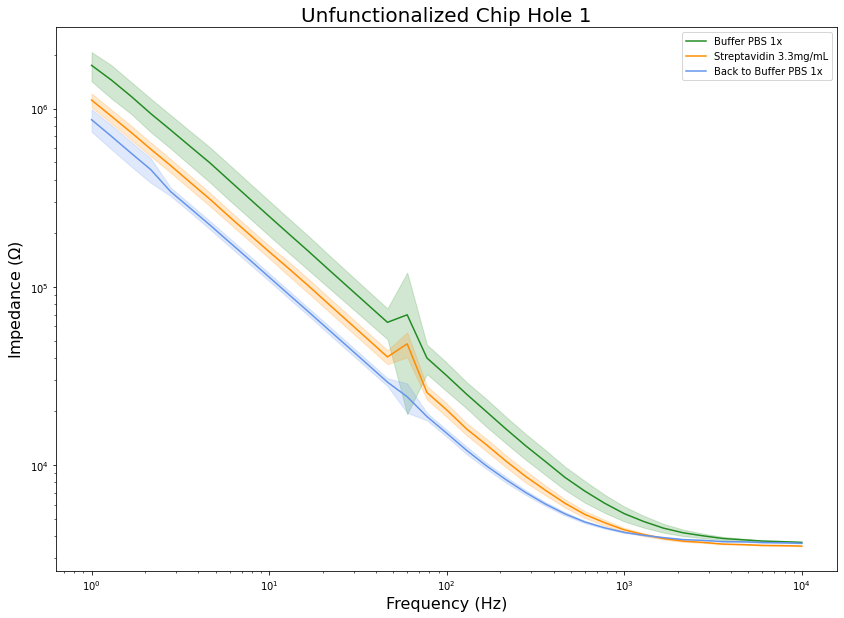

Mean difference between buffer and back to buffer: 129954.05405405405
Mean difference between buffer and strep: 90690.37837837837
Mean difference between strep and back to buffer: 39263.67567567567
Noise level in buffer: 52055.47726455543
Noise level in strep: 13762.824181934746
Noise level in buffer2: 13188.003082849538


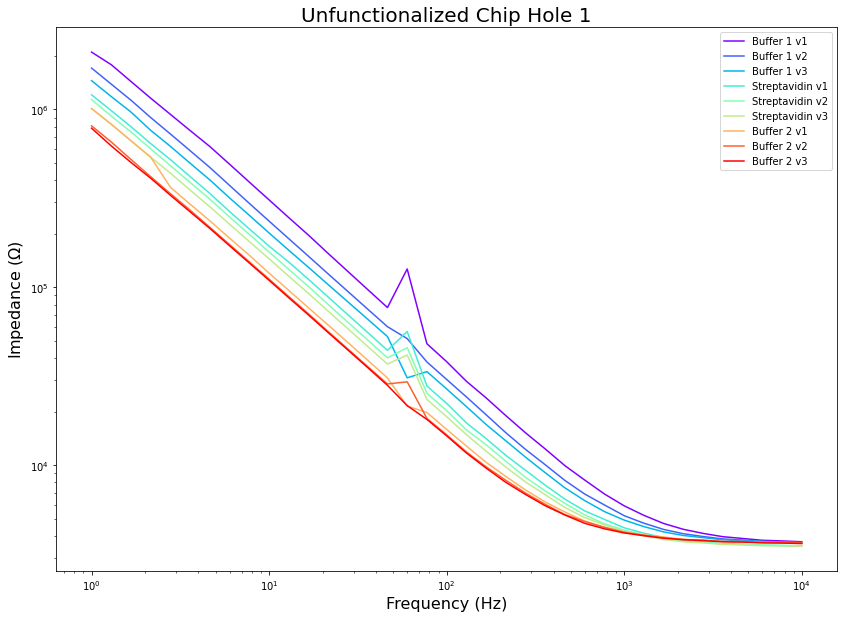

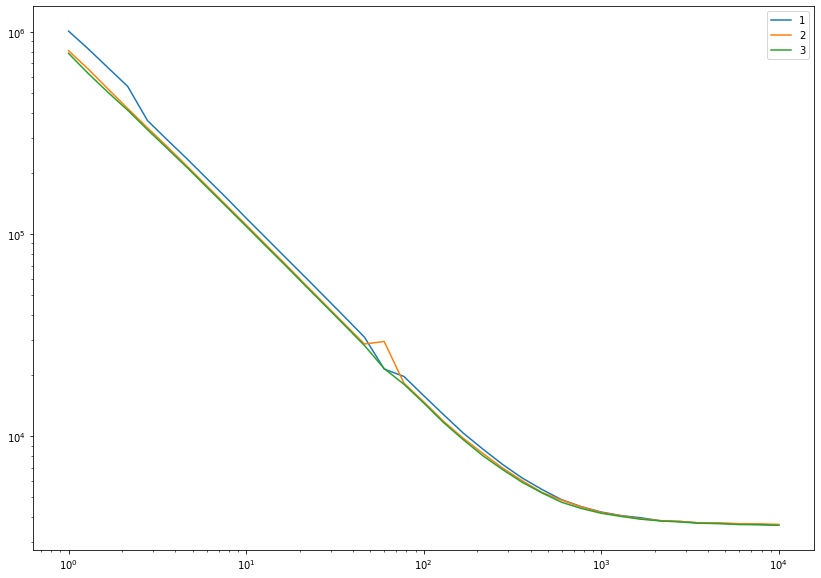

In [105]:
import csv
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.optimize

def cap(x, C):
    return 1 / x / 2 / np.pi / C

def read_esp_2(filename, sets):
    frequencies = []
    impedances = []
    with open(filename, 'rt') as file:
        reader = csv.reader(x.replace('\0', '') for x in file)

        # skip header
        for idx in range(2):
            next(reader)

        for idx in range(sets):
            # read data
            temp_freq = []
            temp_imp = []
            count = 0
            for row in reader:
                # if count == 0:
                #     print(row)
                count += 1
                if count == 84:
                    break
                elif count <= 10:
                    pass
                elif len(row) == 0:
                    pass
                elif row == ['ÿþ']:
                    pass
                else:
                    temp_freq.append(float(row[0]))
                    temp_imp.append(float(row[3]))
            frequencies.append(np.array(temp_freq))
            impedances.append(np.array(temp_imp))
            skip = 2
            try:
                for idx in range(skip):
                    next(reader)
            except:
                break
                
    #     for idx in range(6):
    #         next(reader)
    #     for row in reader:
    #         if len(row) == 0:
    #             pass
    #         elif row == ['ÿþ']:
    #             pass
    #         else:
    #             frequencies.append(float(row[0]))
    #             impedances.append(float(row[3]))
    return frequencies[0], impedances

f, Z = read_esp_2(R'D:\Local Documents\Research\Khalid\Functionalization Measurements\Nonfunctionalized Chip Hole 1.csv', sets=9)

meanZBuffer = np.mean(Z[0:3], axis=0)
stdZBuffer = np.std(Z[0:3], axis=0, ddof=1)
meanZStrep = np.mean(Z[3:6], axis=0)
stdZStrep = np.std(Z[3:6], axis=0, ddof=1)
meanZBuffer2 = np.mean(Z[6:9], axis=0)
stdZBuffer2 = np.std(Z[6:9], axis=0, ddof=1)

# popt, pcov = scipy.optimize.curve_fit(cap, f, meanZBuffer)
# print(popt)

plt.figure(figsize=(14,10))

plt.plot(f, meanZBuffer, 'forestgreen', label='Buffer PBS 1x')
plt.fill_between(f, meanZBuffer - stdZBuffer, meanZBuffer + stdZBuffer, color='forestgreen', alpha=0.2)

plt.plot(f, meanZStrep, 'darkorange', label='Streptavidin 3.3mg/mL')
plt.fill_between(f, meanZStrep - stdZStrep, meanZStrep + stdZStrep, color='darkorange', alpha=0.2)

plt.plot(f, meanZBuffer2, 'cornflowerblue', label='Back to Buffer PBS 1x')
plt.fill_between(f, meanZBuffer2 - stdZBuffer2, meanZBuffer2 + stdZBuffer2, color='cornflowerblue', alpha=0.2)

plt.legend()
plt.title('Unfunctionalized Chip Hole 1', fontsize=20)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Impedance ($\Omega$)', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.savefig(R'D:\Local Documents\Research\Khalid\Functionalization Measurements\Unfunctionalized Chip 1 Overall.png', bbox_inches='tight')
plt.show()

##################################
differenceBufs = np.subtract(meanZBuffer2, meanZBuffer)
meanDifferenceBufs = abs(np.mean(differenceBufs))
differenceBufStrep = np.subtract(meanZStrep, meanZBuffer)
meanDifferenceBufStrep = abs(np.mean(differenceBufStrep))
differenceBuf2Strep = np.subtract(meanZStrep, meanZBuffer2)
meanDifferenceBuf2Strep = abs(np.mean(differenceBuf2Strep))
print('Mean difference between buffer and back to buffer:', meanDifferenceBufs)
print('Mean difference between buffer and strep:', meanDifferenceBufStrep)
print('Mean difference between strep and back to buffer:', meanDifferenceBuf2Strep)
print('Noise level in buffer:', np.mean(stdZBuffer))
print('Noise level in strep:', np.mean(stdZStrep))
print('Noise level in buffer2:', np.mean(stdZBuffer2))


###########################################
# Buffer = [10,6,8] = 1,13,14
# BSA =  [9/11/12/13] = 2,3,15
# Back to buffer 1 = [14,15,16] = 4,5,6
# strep = [17,18,19] = 7,8,9
# back to buffer 2 = [20,21,22] = 10,11,12
testLabels = ['Buffer 1 v1','Buffer 1 v2', 'Buffer 1 v3', 'Streptavidin v1', 'Streptavidin v2', 'Streptavidin v3','Buffer 2 v1','Buffer 2 v2','Buffer 2 v3']
color=iter(plt.cm.rainbow(np.linspace(0,1,len(testLabels))))
plt.figure(figsize=(14,10))
for idx in range(len(testLabels)):
    c = next(color)
    plt.plot(f, Z[idx], label=testLabels[idx], c=c)

plt.legend()
plt.title('Unfunctionalized Chip Hole 1', fontsize=20)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Impedance ($\Omega$)', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.savefig(R'D:\Local Documents\Research\Khalid\Functionalization Measurements\Unfunctionalized Chip 1 All.png', bbox_inches='tight')
plt.show()

# plt.figure(figsize=(14,10))
# plt.plot(f, Z[6], label='1')
# plt.plot(f, Z[7], label='2')
# plt.plot(f, Z[8], label='3')
# plt.legend()
# plt.xscale('log')
# plt.yscale('log')
# plt.show()

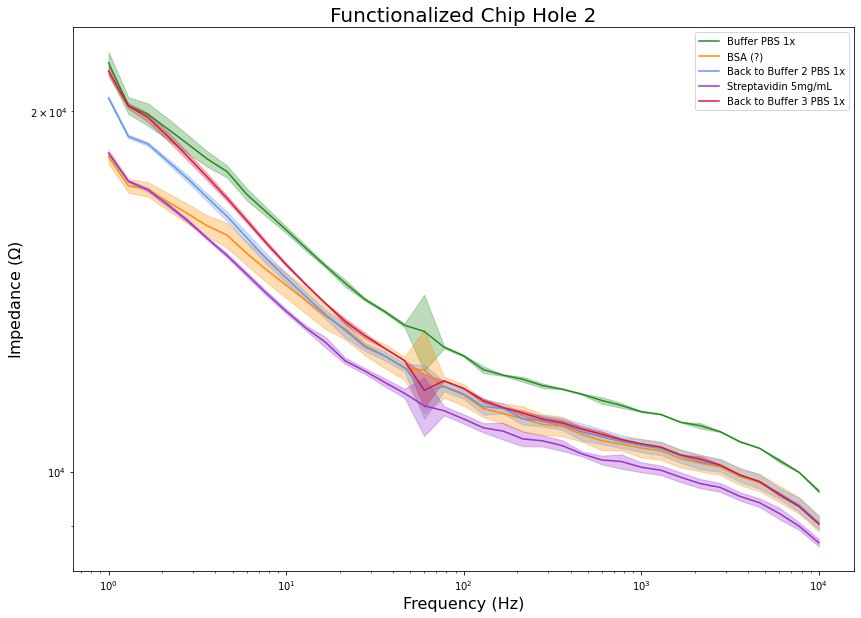

Diff for 1 and 2: 1280.8558558558561
Diff for 1 and 3: 988.027027027027
Diff for 1 and 4: 1702.1531531531532
Diff for 1 and 5: 722.6306306306307
Diff for 2 and 3: 292.82882882882893
Diff for 2 and 4: 421.2972972972973
Diff for 2 and 5: 558.2252252252252
Diff for 3 and 4: 714.1261261261262
Diff for 3 and 5: 265.3963963963963
Diff for 4 and 5: 979.5225225225228
Noise level in buffer: 128.23151485724821
Noise level in BSA: 254.6207307631722
Noise level in buffer2: 137.22021260696738
Noise level in strep: 99.31494764798477
Noise level in buffer3: 61.92441966223133


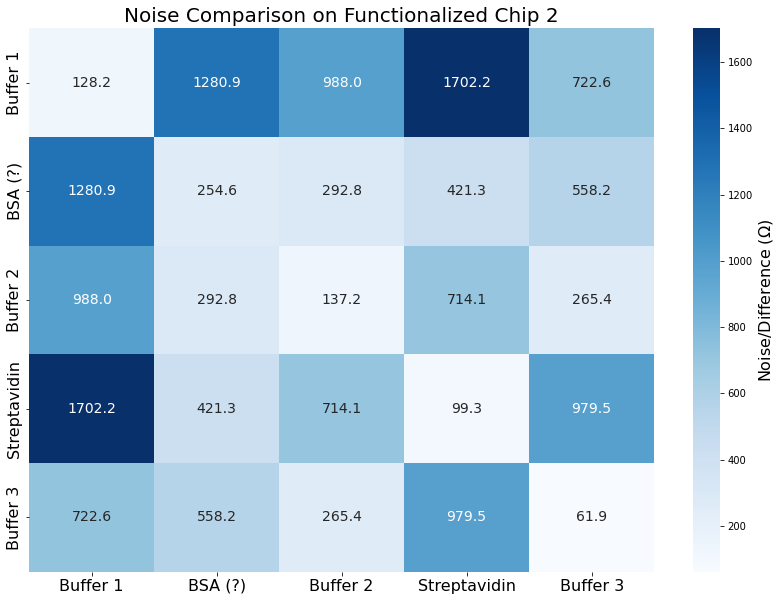

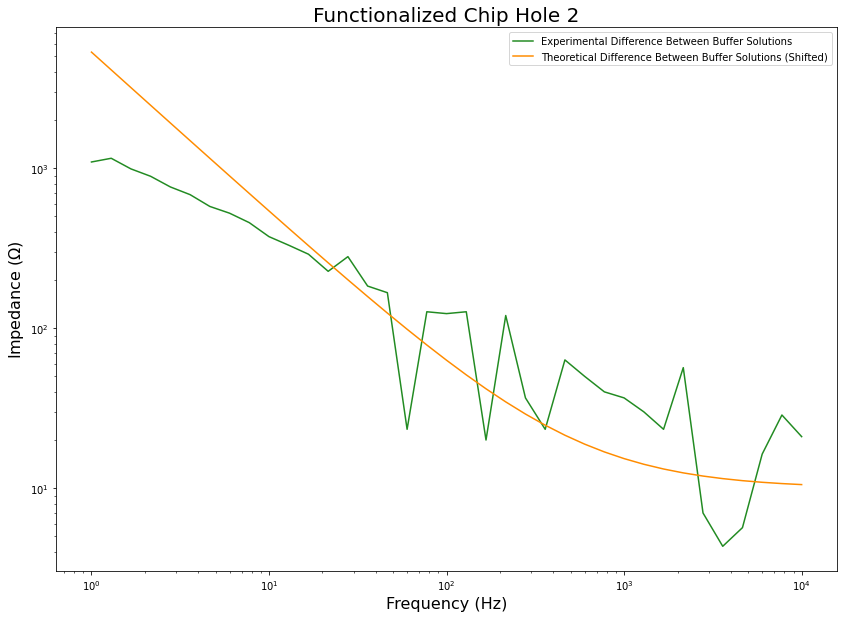

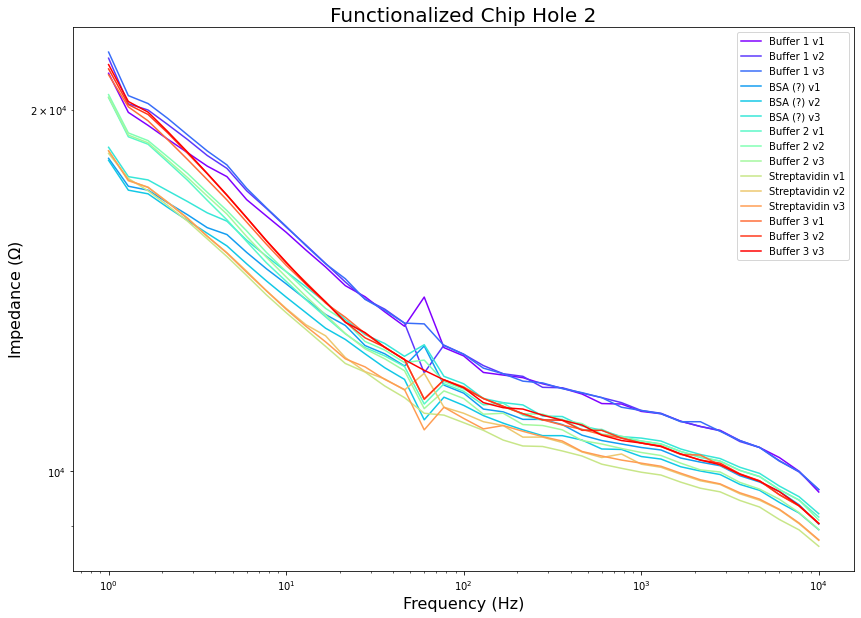

In [1]:
import csv
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.optimize
import itertools
import seaborn as sns

def cap(x, C):
    return 1 / x / 2 / np.pi / C

def read_esp_2(filename, sets):
    frequencies = []
    impedances = []
    with open(filename, 'rt') as file:
        reader = csv.reader(x.replace('\0', '') for x in file)

        # skip header
        for idx in range(2):
            next(reader)

        for idx in range(sets):
            # read data
            temp_freq = []
            temp_imp = []
            count = 0
            for row in reader:
                # if count == 0:
                #     print(row)
                count += 1
                if count == 84:
                    break
                elif count <= 10:
                    pass
                elif len(row) == 0:
                    pass
                elif row == ['ÿþ']:
                    pass
                else:
                    temp_freq.append(float(row[0]))
                    temp_imp.append(float(row[3]))
            frequencies.append(np.array(temp_freq))
            impedances.append(np.array(temp_imp))
            skip = 2
            try:
                for idx in range(skip):
                    next(reader)
            except:
                break
                
    #     for idx in range(6):
    #         next(reader)
    #     for row in reader:
    #         if len(row) == 0:
    #             pass
    #         elif row == ['ÿþ']:
    #             pass
    #         else:
    #             frequencies.append(float(row[0]))
    #             impedances.append(float(row[3]))
    return frequencies[0], impedances

f, Z = read_esp_2(R'D:\Local Documents\Research\Khalid\Functionalization Measurements\Biotin Chip Hole 2.csv', sets=15)

# Buffer = [10,6,8] = 1,13,14
# BSA =  [9/11/12/13] = 2,3,15
# Back to buffer 1 = [14,15,16] = 4,5,6
# strep = [17,18,19] = 7,8,9
# back to buffer 2 = [20,21,22] = 10,11,12

meanZBuffer = np.mean(np.array([Z[0], Z[12], Z[13]]), axis=0)
stdZBuffer = np.std(np.array([Z[0], Z[12], Z[13]]), axis=0, ddof=1)
meanZBSA = np.mean(np.array([Z[1], Z[2], Z[14]]), axis=0)
stdZBSA = np.std(np.array([Z[1], Z[2], Z[14]]), axis=0, ddof=1)
meanZBuffer2 = np.mean(np.array([Z[3], Z[4], Z[5]]), axis=0)
stdZBuffer2 = np.std(np.array([Z[3], Z[4], Z[5]]), axis=0, ddof=1)
meanZStrep = np.mean(np.array([Z[6], Z[7], Z[8]]), axis=0)
stdZStrep = np.std(np.array([Z[6], Z[7], Z[8]]), axis=0, ddof=1)
meanZBuffer3 = np.mean(np.array([Z[9], Z[10], Z[11]]), axis=0)
stdZBuffer3 = np.std(np.array([Z[9], Z[10], Z[11]]), axis=0, ddof=1)

# # popt, pcov = scipy.optimize.curve_fit(cap, f, meanZBuffer)
# # print(popt)

plt.figure(figsize=(14,10))

plt.plot(f, meanZBuffer, 'forestgreen', label='Buffer PBS 1x')
plt.fill_between(f, meanZBuffer - stdZBuffer, meanZBuffer + stdZBuffer, color='forestgreen', alpha=0.3)

plt.plot(f, meanZBSA, 'darkorange', label='BSA (?)')
plt.fill_between(f, meanZBSA - stdZBSA, meanZBSA + stdZBSA, color='darkorange', alpha=0.3)

plt.plot(f, meanZBuffer2, 'cornflowerblue', label='Back to Buffer 2 PBS 1x')
plt.fill_between(f, meanZBuffer2 - stdZBuffer2, meanZBuffer2 + stdZBuffer2, color='cornflowerblue', alpha=0.3)

plt.plot(f, meanZStrep, 'darkorchid', label='Streptavidin 5mg/mL')
plt.fill_between(f, meanZStrep - stdZStrep, meanZStrep + stdZStrep, color='darkorchid', alpha=0.3)

plt.plot(f, meanZBuffer3, 'crimson', label='Back to Buffer 3 PBS 1x')
plt.fill_between(f, meanZBuffer3 - stdZBuffer3, meanZBuffer3 + stdZBuffer3, color='crimson', alpha=0.3)

plt.legend()
plt.title('Functionalized Chip Hole 2', fontsize=20)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Impedance ($\Omega$)', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.savefig(R'D:\Local Documents\Research\Khalid\Functionalization Measurements\Functionalized Chip 2 Overall.png', bbox_inches='tight')
plt.show()

#########################################
meanVals = [meanZBuffer, meanZBSA, meanZBuffer2, meanZStrep, meanZBuffer3]
meanValsIdx = list(np.arange(0,len(meanVals)))
diffArr = np.zeros((5,5))
for subset in itertools.combinations(meanValsIdx, 2):
    diff = np.subtract(meanVals[subset[0]], meanVals[subset[1]])
    meanDiff = abs(np.mean(diff))
    diffArr[subset[0], subset[1]] = meanDiff
    diffArr[subset[1], subset[0]] = meanDiff
    print('Diff for {} and {}:'.format(subset[0]+1, subset[1]+1), meanDiff)
diffArr[0,0] = np.mean(stdZBuffer)
diffArr[1,1] = np.mean(stdZBSA)
diffArr[2,2] = np.mean(stdZBuffer2)
diffArr[3,3] = np.mean(stdZStrep)
diffArr[4,4] = np.mean(stdZBuffer3)
print('Noise level in buffer:', np.mean(stdZBuffer))
print('Noise level in BSA:', np.mean(stdZBSA))
print('Noise level in buffer2:', np.mean(stdZBuffer2))
print('Noise level in strep:', np.mean(stdZStrep))
print('Noise level in buffer3:', np.mean(stdZBuffer3))

plt.figure(figsize=(14,10))
axis_labels = ['Buffer 1', 'BSA (?)', 'Buffer 2', 'Streptavidin', 'Buffer 3']
p = sns.heatmap(diffArr,annot=True,fmt='.1f',cmap="Blues", annot_kws={"size":14}, cbar_kws={'label': 'Noise/Difference ($\Omega$)'})
p.set_yticklabels(axis_labels, size = 16, va="center")
p.set_xticklabels(axis_labels, size = 16)
p.figure.axes[-1].yaxis.label.set_size(16)
plt.title('Noise Comparison on Functionalized Chip 2', fontsize=20)
plt.savefig(R'D:\Local Documents\Research\Khalid\Functionalization Measurements\Functionalized Chip 2 Noise Heatmap.png', bbox_inches='tight')
plt.show()

###########################################
diffBuffer2Buffer3 = np.subtract(meanZBuffer2, meanZBuffer3)
meanDiffBuffer2Buffer3 = abs(np.mean(diffBuffer2Buffer3))
stdDifference = np.sqrt(stdZBuffer3**2 + stdZBuffer2**2)

plt.figure(figsize=(14,10))
plt.plot(f, abs(diffBuffer2Buffer3), 'forestgreen', label='Experimental Difference Between Buffer Solutions')
cap = 10e-6
capChange = 5e-6
plt.plot(f, -(1 / f / 2 / np.pi / (cap+capChange)) + (1 / f / 2 / np.pi / cap) + 10, 'darkorange', label='Theoretical Difference Between Buffer Solutions (Shifted)')
# plt.fill_between(f, meanDiffBuffer2Buffer3 - stdDifference, meanDiffBuffer2Buffer3 + stdDifference, color='forestgreen', alpha=0.2)
plt.legend()
plt.title('Functionalized Chip Hole 2', fontsize=20)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Impedance ($\Omega$)', fontsize=16)
plt.yscale('log')
plt.xscale('log')
plt.savefig(R'D:\Local Documents\Research\Khalid\Functionalization Measurements\Functionalized Chip 2 Differences.png', bbox_inches='tight')
plt.show()

###########################################
# Buffer = [10,6,8] = 1,13,14
# BSA =  [9/11/12/13] = 2,3,15
# Back to buffer 1 = [14,15,16] = 4,5,6
# strep = [17,18,19] = 7,8,9
# back to buffer 2 = [20,21,22] = 10,11,12
# testLabels = ['Buffer 1 v1','BSA (?) v1', 'BSA (?) v2', 'Buffer 2 v1','Buffer 2 v2','Buffer 2 v3','Streptavidin v1', 'Streptavidin v2', 'Streptavidin v3', 
#                 'Buffer 3 v1','Buffer 3 v2','Buffer 3 v3','Buffer 1 v2', 'Buffer 1 v3','BSA (?) v3']
testLabels = ['Buffer 1 v1','Buffer 1 v2', 'Buffer 1 v3','BSA (?) v1', 'BSA (?) v2', 'BSA (?) v3', 'Buffer 2 v1','Buffer 2 v2','Buffer 2 v3','Streptavidin v1', 'Streptavidin v2', 'Streptavidin v3', 
                'Buffer 3 v1','Buffer 3 v2','Buffer 3 v3']
color=iter(plt.cm.rainbow(np.linspace(0,1,len(testLabels))))
testReferenceHash = {0:0, 1:12, 2:13, 3:1, 4:2, 5:14, 6:3, 7:4, 8:5, 9:6, 10:7, 11:8, 12:9, 13:10, 14:11}
plt.figure(figsize=(14,10))
for idx in range(len(testLabels)):
    c=next(color)
    plt.plot(f, Z[testReferenceHash[idx]], label=testLabels[idx], c=c)

plt.legend()
plt.title('Functionalized Chip Hole 2', fontsize=20)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Impedance ($\Omega$)', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.savefig(R'D:\Local Documents\Research\Khalid\Functionalization Measurements\Functionalized Chip 2 All.png', bbox_inches='tight')
plt.show()

# plt.figure(figsize=(14,10))
# plt.plot(f, Z[9], label='1')
# plt.plot(f, Z[10], label='2')
# plt.plot(f, Z[11], label='3')
# plt.legend()
# plt.xscale('log')
# plt.yscale('log')
# plt.show()

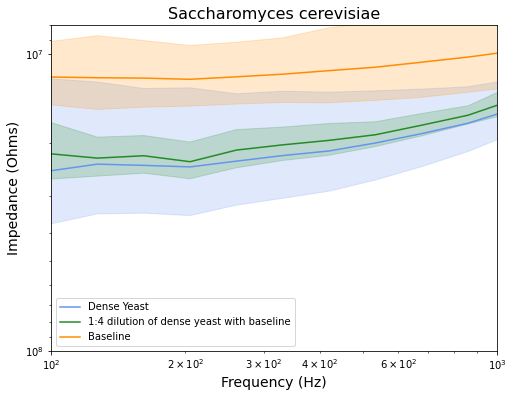

In [37]:
def read_esp_2(filename, sets):
    frequencies = []
    impedances = []
    with open(filename, 'rt') as file:
        reader = csv.reader(x.replace('\0', '') for x in file)
        # skip header
        for idx in range(2):
            next(reader)

        for idx in range(sets):
            # read data
            temp_freq = []
            temp_imp = []
            count = 0
            for row in reader:
                # if count == 0:
                #     print(row)
                count += 1
                if count == 64:
                    break
                elif count <= 10:
                    pass
                elif len(row) == 0:
                    pass
                elif row == ['ÿþ']:
                    pass
                else:
                    try:
                        temp_freq.append(float(row[0]))
                        temp_imp.append(float(row[3]))
                    except:
                        pass
            frequencies.append(np.array(temp_freq))
            impedances.append(np.array(temp_imp))
            skip = 2
            try:
                for idx in range(skip):
                    next(reader)
            except:
                break
                
    #     for idx in range(6):
    #         next(reader)
    #     for row in reader:
    #         if len(row) == 0:
    #             pass
    #         elif row == ['ÿþ']:
    #             pass
    #         else:
    #             frequencies.append(float(row[0]))
    #             impedances.append(float(row[3]))
    return frequencies[0], impedances

freq, imp = read_esp_2(R'D:\Local Documents\Research\Khalid\Living Cells\Yeast measurement 20220211.csv', sets=12)
yeast = np.mean([imp[1], imp[4], imp[5]], axis=0)
std_yeast = np.std([imp[1], imp[4], imp[5]], axis=0, ddof=1)
baseline = np.mean([imp[6], imp[7], imp[8]], axis=0)
std_baseline = np.std([imp[8], imp[6], imp[7]], axis=0, ddof=1)
mid_yeast = np.mean([imp[-1], imp[2], imp[3]], axis=0)
std_mid_yeast = np.std([imp[-1], imp[2], imp[3]], axis=0, ddof=1)

# print(imp[0])

plt.figure(figsize=(8,6))
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Impedance (Ohms)', fontsize=14)
plt.title('Saccharomyces cerevisiae', fontsize=16)
plt.yscale('log')
plt.xscale('log')
plt.plot(freq, yeast, color='cornflowerblue', label='Dense Yeast')
plt.fill_between(freq, yeast - std_yeast, yeast + std_yeast, color='cornflowerblue', alpha=0.2)
plt.plot(freq, mid_yeast, color='forestgreen', label='1:4 dilution of dense yeast with baseline')
plt.fill_between(freq, mid_yeast - std_mid_yeast, mid_yeast + std_mid_yeast, color='forestgreen', alpha=0.2)
plt.plot(freq, baseline, color='darkorange', label='Baseline')
plt.fill_between(freq, baseline - std_baseline, baseline + std_baseline, color='darkorange', alpha=0.2)
plt.legend()
plt.savefig('D:\Local Documents\Research\Khalid\Living Cells\Yeast Measurement 20220211 plot.png', dpi=300, bbox_inches='tight')
plt.xlim([10**2, 10**3])
plt.ylim([10**8, 8*10**6])
plt.savefig('D:\Local Documents\Research\Khalid\Living Cells\Yeast Measurement 20220211 plot zoom.png', dpi=300, bbox_inches='tight')
plt.show()